# Thinking about weights

Author: Junita Sirait

How to weigh my graph??

Table of contents:

1. [Reading file](#sub1)
2. [Co-occurences statistics](#sub2)
3. [Building contribution matrix](#sub3)
4. [Co-occurence distribution matrix heatmap](#sub4)

In [34]:
import json
import pandas as pd

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

<a id="sub1"></a>
## Reading file

In [158]:
with open("co_occurences.json", "r", encoding="utf-8") as infile:
    cc = json.load(infile)

<a id="sub2"></a>
## Co-occurences statistics

In [159]:
# occurences of the first news source
ns1o = pd.Series([pair[0] for pair in cc])

In [160]:
# occurences of the second news source
ns2o = pd.Series([pair[1] for pair in cc])

In [161]:
diffs = pd.Series([ns2o[i]-ns1o[i] for i in range(len(cc))])

In [162]:
ns1o.describe()

count    5.885068e+06
mean     2.998026e+00
std      1.163520e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.574000e+03
dtype: float64

(array([4.52578e+06, 6.86562e+05, 4.53871e+05, 1.44170e+05, 4.82580e+04,
        1.92480e+04, 5.21200e+03, 1.53200e+03, 3.91000e+02, 4.40000e+01]),
 array([0.        , 0.78532164, 1.57064328, 2.35596492, 3.14128656,
        3.92660819, 4.71192983, 5.49725147, 6.28257311, 7.06789475,
        7.85321639]),
 <BarContainer object of 10 artists>)

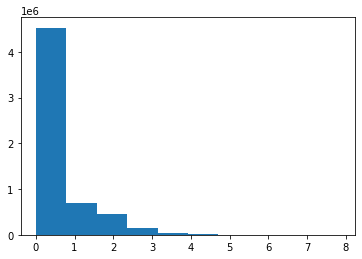

In [165]:
plt.hist(np.log(ns1o))

In [166]:
ns2o.describe()

count    5.885068e+06
mean     3.531876e+01
std      1.453129e+02
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.600000e+01
max      3.237000e+03
dtype: float64

(array([1673245., 1346567., 1039840.,  749119.,  467122.,  314798.,
         153983.,   83102.,   41546.,   15746.]),
 array([0.        , 0.80824023, 1.61648045, 2.42472068, 3.2329609 ,
        4.04120113, 4.84944135, 5.65768158, 6.4659218 , 7.27416203,
        8.08240225]),
 <BarContainer object of 10 artists>)

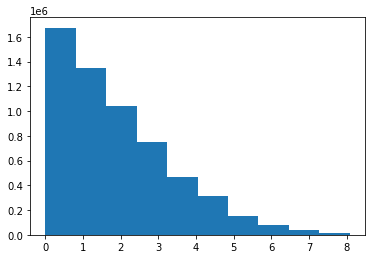

In [169]:
plt.hist(np.log(ns2o))

In [168]:
diffs.describe()

count    5.885068e+06
mean     3.232074e+01
std      1.431186e+02
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.300000e+01
max      3.236000e+03
dtype: float64

<a id="sub3"></a>
## Building  co-occurence matrix

In [179]:
MAX_X = 2575 # max occurences of ns1 + 1
MAX_Y = 3238   # max occurences of ns2 + 1

In [185]:
matrix = [[0 for i in range(MAX_Y)] for i in range(MAX_X)]
count = Counter()

In [186]:
for p in cc:
    # p is a tuple of cooccurences
    p1, p2 = p
    # print(p)
    matrix[p1][p2] += 1
    count[tuple(p)] += 1

In [187]:
print([max(row) for row in matrix])

[0, 836764, 161631, 58598, 28475, 15412, 8930, 5780, 3775, 2585, 1700, 1338, 1162, 880, 633, 570, 415, 301, 280, 239, 164, 190, 153, 123, 120, 83, 105, 73, 75, 44, 66, 79, 50, 56, 40, 34, 42, 29, 26, 36, 25, 28, 16, 26, 22, 19, 13, 24, 16, 15, 22, 19, 18, 10, 22, 13, 14, 15, 12, 12, 10, 9, 14, 10, 7, 6, 8, 14, 9, 15, 14, 11, 11, 16, 11, 10, 7, 7, 7, 7, 7, 6, 6, 3, 11, 6, 4, 14, 7, 7, 2, 4, 6, 3, 5, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 6, 3, 3, 2, 3, 4, 4, 3, 5, 8, 1, 2, 4, 3, 3, 2, 4, 1, 5, 3, 3, 3, 5, 2, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 3, 3, 4, 1, 1, 1, 2, 1, 0, 1, 2, 3, 3, 2, 1, 1, 1, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 3, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0

In [188]:
matrix[1][1]

836764

In [189]:
matrix[2][2]

146653

In [190]:
matrix[3][4]

58598

In [191]:
len(cc)

5885068

We can see that there are a lot of co-occurences with one news source occuring only once. Let's define a relationship as meaningful if each of the news source in a pair occurs at least 5 times.

In [193]:
meaningful = [k for k in count.most_common() if k[0][0]>10 and k[0][1]>10]
meaningful[:5]

[((11, 12), 1338),
 ((11, 13), 1300),
 ((12, 13), 1162),
 ((11, 14), 1044),
 ((11, 15), 953)]

In [194]:
pd.Series([p[0][0] for p in meaningful]).describe()

count    31311.000000
mean        87.938424
std        118.227730
min         11.000000
25%         28.000000
50%         54.000000
75%         97.000000
max       2574.000000
dtype: float64

In [195]:
pd.Series([p[0][1] for p in meaningful]).describe()

count    31311.000000
mean       474.311680
std        515.467886
min         11.000000
25%        151.000000
50%        286.000000
75%        598.000000
max       3237.000000
dtype: float64

In [196]:
ratio = pd.Series([p[0][0]/p[0][1] for p in meaningful])
ratio.describe()

count    31311.000000
mean         0.307158
std          0.268077
min          0.003398
25%          0.084734
50%          0.216981
75%          0.475883
max          1.000000
dtype: float64

(array([9271., 5741., 3822., 2898., 2311., 1911., 1619., 1349., 1227.,
        1162.]),
 array([0.00339821, 0.10305839, 0.20271857, 0.30237875, 0.40203892,
        0.5016991 , 0.60135928, 0.70101946, 0.80067964, 0.90033982,
        1.        ]),
 <BarContainer object of 10 artists>)

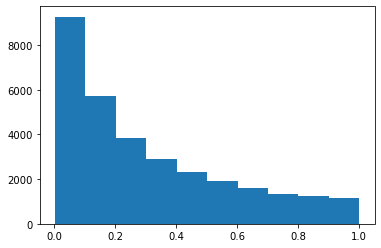

In [197]:
plt.hist(ratio)

In [199]:
maxx = max([k[0][0] for k in meaningful])
maxy = max([k[0][1] for k in meaningful])
print(f"{maxx}, {maxy}")

2574, 3237


In [200]:
mmatrix = [[0 for i in range(maxx+1)] for i in range(maxy+1)]
for p in meaningful:
    # p is a tuple of cooccurences
    pair, num = p
    # print(p)
    mmatrix[pair[1]][pair[0]] += num #pair[0]/pair[1]

<a id="sub4"></a>
# Co-occurence distribution matrix heatmap

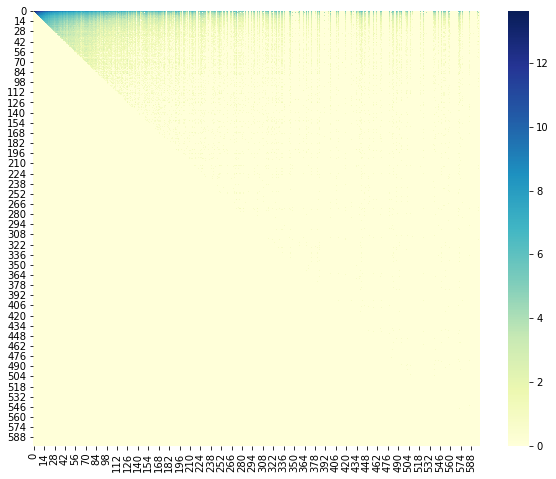

In [208]:
plt.figure(figsize = (10,8))
# ax = sns.heatmap(np.log(np.array(matrix)+1), cmap="YlGnBu", vmin=1, vmax=4)
ax = sns.heatmap(np.log(np.array([m[:600] for m in matrix[:600]])+1), cmap="YlGnBu") #, vmin=1, vmax=4)

# plt.show()

<a id="sub5"></a>
## Contribution visualization

In [224]:
def contribution(min_occ, max_occ):
    '''
    we calculate a pair's co-occurence in one subreddit as
    (min_occ/max_occ) * ((min_occ+max_occ)/2)
    
    (min_occ/max_occ) rewards similar occurences
    
    ((min_occ+max_occ)/2) rewards high occurences
    '''
    return (min_occ/max_occ) * ((min_occ+max_occ))

In [225]:
occ1 = range(1,600)
occ2 = range(1,600)

occ_matrix = [[0 for i in range(600)] for i in range(600)]
for ii in occ1:
    for jj in occ2:
        try:
            occ_matrix[ii][jj] = contribution(min(ii,jj), max(ii,jj))
        except:
            print(f"{ii}, {jj}")

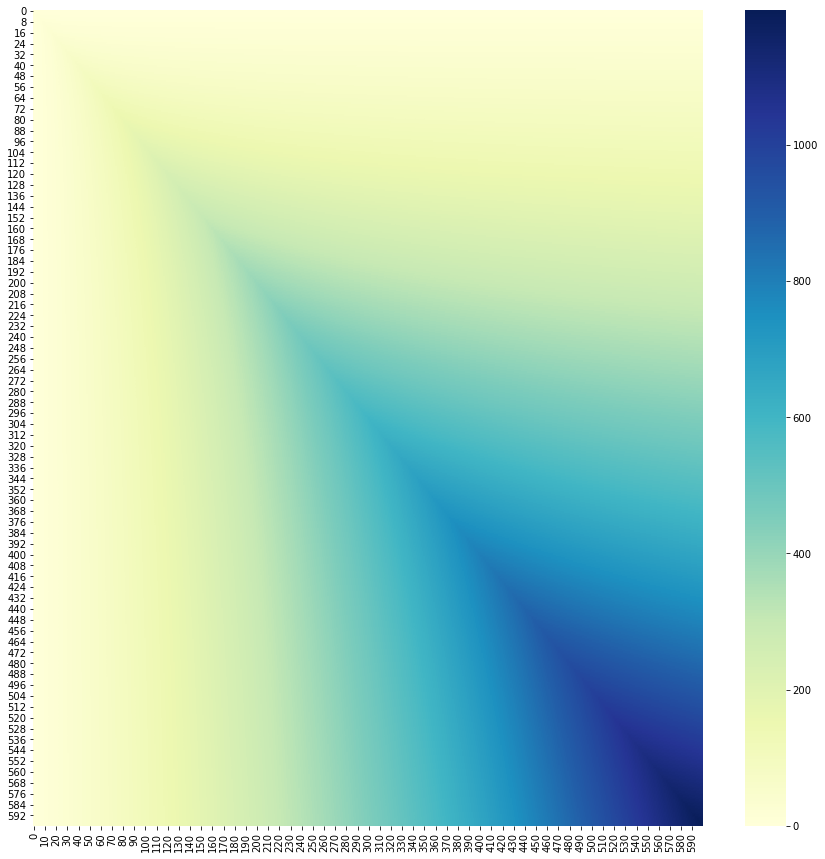

In [226]:
plt.figure(figsize = (15,15))
# ax = sns.heatmap(np.log(np.array(matrix)+1), cmap="YlGnBu", vmin=1, vmax=4)
ax = sns.heatmap(occ_matrix, cmap="YlGnBu") #, vmin=1, vmax=4)

# plt.show()